In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

# Metrics to evaluate performance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


from sklearn.preprocessing import StandardScaler


In [65]:
df = pd.read_csv(r"D:\Saikrupa\SEM 6\PROJECT-2\dataset10000.csv")
df.head()

,Participant ID,Age,Haematocrit percentage,Haemoglobin concentration,Red blood cell (erythrocyte) distribution width,Body mass index (BMI),Cooked vegetable intake,Salad / raw vegetable intake,Fresh fruit intake,Dried fruit intake,Oily fish intake,Processed meat intake,Lamb/mutton intake,Never eat,Sugar,Anaemia,Sex_Female,Sex_Male
0,1001184,64,35.28,11.90,15.72,27.8801,1.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,7.98,1,0,1
1,1009563,69,40.11,14.56,12.64,21.0832,4.0,3.0,0.0,6.0,2.0,3.0,1.0,3.0,7.78,1,0,1
2,1010314,63,42.40,14.26,14.74,30.5497,3.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,12.40,1,1,0
3,1011266,67,39.89,13.62,13.22,25.0156,2.0,2.0,3.0,1.0,2.0,3.0,2.0,3.0,7.39,1,1,0
4,1012761,62,34.22,11.64,13.32,21.7013,2.0,1.0,1.0,0.0,1.0,1.0,1.0,3.0,3.79,1,1,0


In [66]:
df["Anaemia"].value_counts()

Anaemia
0    20468
1     1008
Name: count, dtype: int64

In [67]:
from imblearn.over_sampling import RandomOverSampler
y=df["Anaemia"]
X=df.drop(['Anaemia'],axis=1)
oversampler = RandomOverSampler(random_state=42)
X_oversampled,y_oversampled=oversampler.fit_resample(X,y)
df = pd.DataFrame(X_oversampled,columns=X.columns)
df["Anaemia"]=y_oversampled
# from imblearn.under_sampling import RandomUnderSampler

# # Define the target and features
# y = df["Anaemia"]
# X = df.drop(['Anaemia'], axis=1)

# # Initialize the undersampler
# undersampler = RandomUnderSampler(random_state=42)

# # Apply the undersampler to the data
# X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

# # Create a new DataFrame with the undersampled data
# df_undersampled = pd.DataFrame(X_undersampled, columns=X.columns)
# df_undersampled["Anaemia"] = y_undersampled

# # Display the class distribution in the undersampled dataset
# print(df_undersampled["Anaemia"].value_counts())


In [68]:
df.columns

Index(['Participant ID', 'Age', 'Haematocrit percentage',
       'Haemoglobin concentration',
       'Red blood cell (erythrocyte) distribution width',
       'Body mass index (BMI)', 'Cooked vegetable intake',
       'Salad / raw vegetable intake', 'Fresh fruit intake',
       'Dried fruit intake', 'Oily fish intake', 'Processed meat intake',
       'Lamb/mutton intake', 'Never eat', 'Sugar', 'Sex_Female', 'Sex_Male',
       'Anaemia'],
      dtype='object')

In [69]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X and y are your original features and labels
y = df['Anaemia']
X = df.drop(columns=['Anaemia',"Participant ID"])




In [70]:
# Calculate z-scores for each column
z_scores = np.abs(stats.zscore(X))

# Define a threshold for z-scores to identify outliers
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

# Remove outliers
clean_indices = (z_scores < threshold).all(axis=1)
X_clean = X[clean_indices]
y_clean = y[clean_indices]

# Split the cleaned dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=27)


In [71]:
df["Anaemia"].value_counts()

Anaemia
1    20468
0    20468
Name: count, dtype: int64

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred4 = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy)

Accuracy: 0.9986990056686181


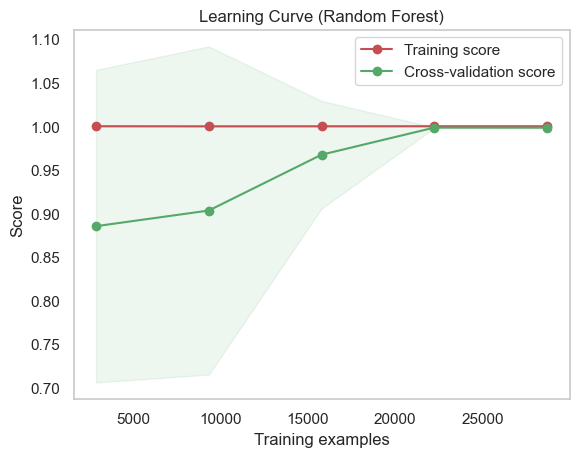

In [73]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Assuming X_clean and y_clean are your features and labels
# Reduce the number of trees (analogous to reducing epochs)
model = RandomForestClassifier(n_estimators=75, random_state=11)  # Reduced from default 100 to 50

# Plot the learning curve
plot_learning_curve(model, "Learning Curve (Random Forest)", X_clean, y_clean, cv=5, n_jobs=-1)
plt.show()

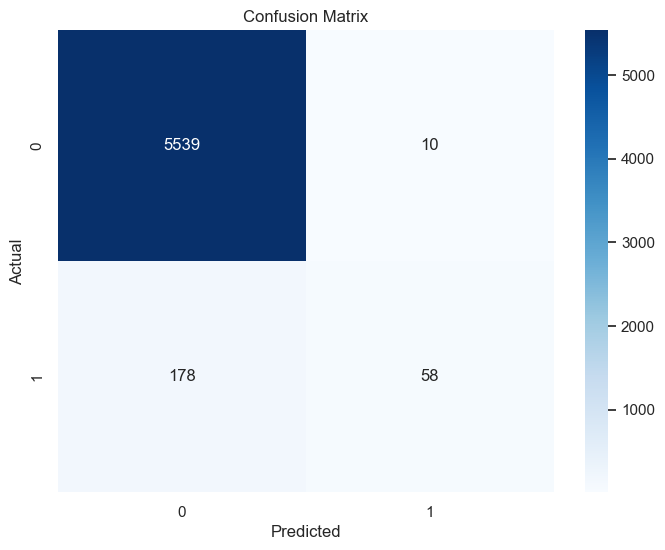

F1 Score: 0.9587648005750841
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5549
           1       0.85      0.25      0.38       236

    accuracy                           0.97      5785
   macro avg       0.91      0.62      0.68      5785
weighted avg       0.96      0.97      0.96      5785



In [63]:
from sklearn import metrics

# Assume y_test and y_pred4 are already defined
confusion_matrix = metrics.confusion_matrix(y_test, y_pred4)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(confusion_matrix, index=[0, 1], columns=[0, 1])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

f1_score = metrics.f1_score(y_test, y_pred4, average='weighted')
print("F1 Score:", f1_score)

# Generate classification report
classification_report = metrics.classification_report(y_test, y_pred4)
print("Classification Report:\n", classification_report)

C:\Users\91886\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


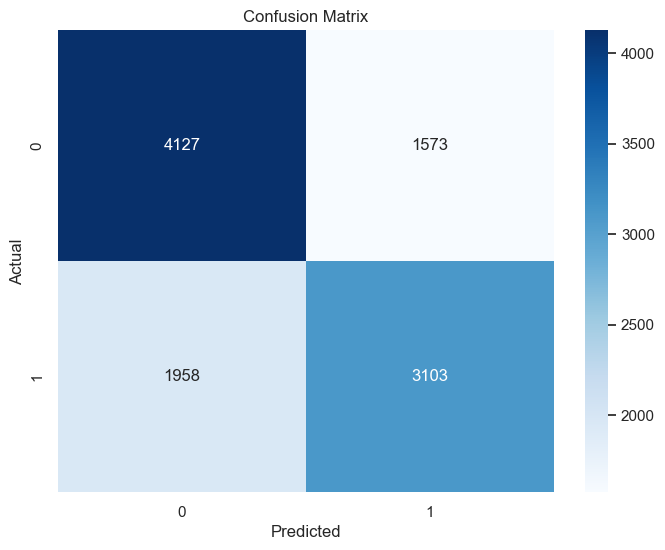

F1 Score: 0.6707433141192726
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70      5700
           1       0.66      0.61      0.64      5061

    accuracy                           0.67     10761
   macro avg       0.67      0.67      0.67     10761
weighted avg       0.67      0.67      0.67     10761



In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics  # Import metrics module from sklearn

# Assuming you have already defined X_train, X_test, y_train, y_test

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_prediction1 = model1.predict(X_test)
confusion_matrix1 = metrics.confusion_matrix(y_test, y_prediction1)
# Create a DataFrame for better visualization
cm_df1 = pd.DataFrame(confusion_matrix1, index=[0, 1], columns=[0, 1])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
f1_score = metrics.f1_score(y_test, y_prediction1, average='weighted')
print("F1 Score:", f1_score)

# Generate classification report
classification_report = metrics.classification_report(y_test, y_prediction1)
print("Classification Report:\n", classification_report)


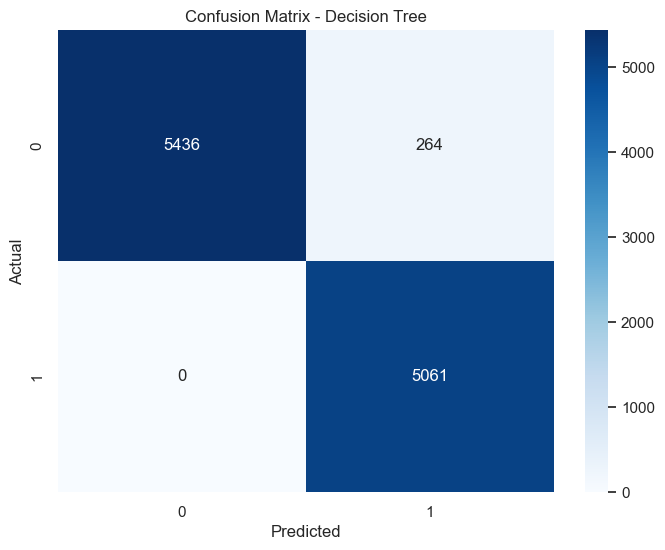

F1 Score: 0.9754879635365713
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98      5700
           1       0.95      1.00      0.97      5061

    accuracy                           0.98     10761
   macro avg       0.98      0.98      0.98     10761
weighted avg       0.98      0.98      0.98     10761



In [99]:
from sklearn.tree import DecisionTreeClassifier
# Assuming you have already defined X_train, X_test, y_train, y_test

model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_prediction2 = model2.predict(X_test)

confusion_matrix2 = metrics.confusion_matrix(y_test, y_prediction2)
# Create a DataFrame for better visualization
cm_df2 = pd.DataFrame(confusion_matrix2, index=[0, 1], columns=[0, 1])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

f1_score2 = metrics.f1_score(y_test, y_prediction2, average='weighted')
print("F1 Score:", f1_score2)

classification_report2 = metrics.classification_report(y_test, y_prediction2)
print("Classification Report:\n", classification_report2)


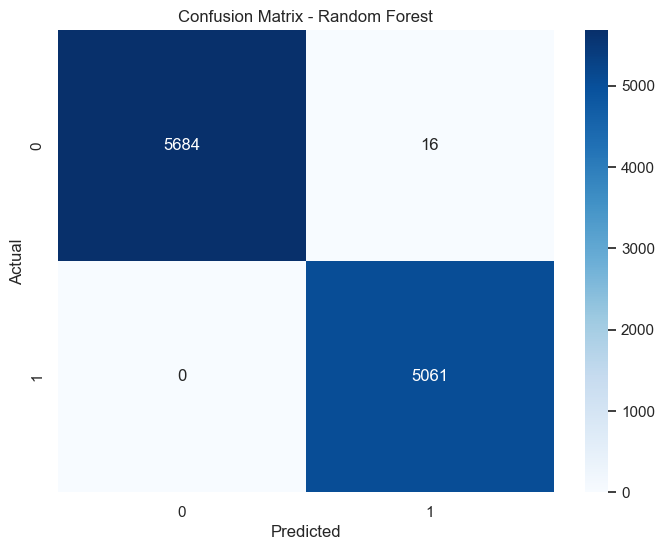

F1 Score: 0.9985132777542453
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5700
           1       1.00      1.00      1.00      5061

    accuracy                           1.00     10761
   macro avg       1.00      1.00      1.00     10761
weighted avg       1.00      1.00      1.00     10761



In [100]:
from sklearn.ensemble import RandomForestClassifier
# Assuming you have already defined X_train, X_test, y_train, y_test

model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
y_prediction3 = model3.predict(X_test)

confusion_matrix3 = metrics.confusion_matrix(y_test, y_prediction3)
cm_df3 = pd.DataFrame(confusion_matrix3, index=[0, 1], columns=[0, 1])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

f1_score3 = metrics.f1_score(y_test, y_prediction3, average='weighted')
print("F1 Score:", f1_score3)

classification_report3 = metrics.classification_report(y_test, y_prediction3)
print("Classification Report:\n", classification_report3)


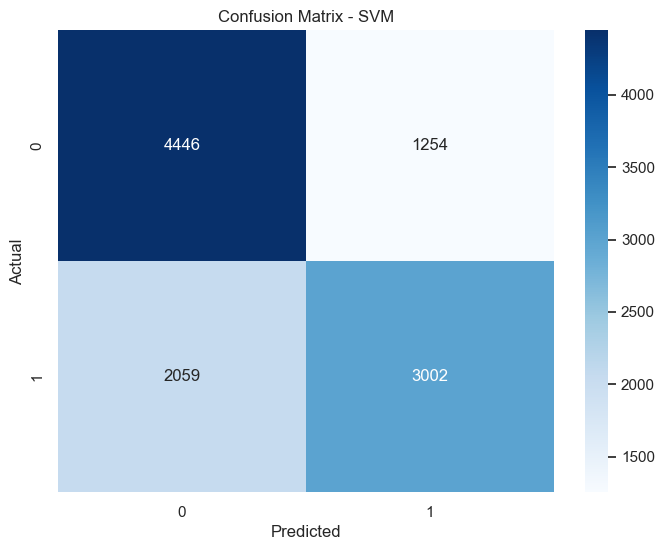

F1 Score: 0.6889818302658828
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.78      0.73      5700
           1       0.71      0.59      0.64      5061

    accuracy                           0.69     10761
   macro avg       0.69      0.69      0.69     10761
weighted avg       0.69      0.69      0.69     10761



In [101]:
from sklearn.svm import SVC
# Assuming you have already defined X_train, X_test, y_train, y_test

model4 = SVC()
model4.fit(X_train, y_train)
y_prediction4 = model4.predict(X_test)

confusion_matrix4 = metrics.confusion_matrix(y_test, y_prediction4)
# Create a DataFrame for better visualization
cm_df4 = pd.DataFrame(confusion_matrix4, index=[0, 1], columns=[0, 1])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df4, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

f1_score4 = metrics.f1_score(y_test, y_prediction4, average='weighted')
print("F1 Score:", f1_score4)

classification_report4 = metrics.classification_report(y_test, y_prediction4)
print("Classification Report:\n", classification_report4)


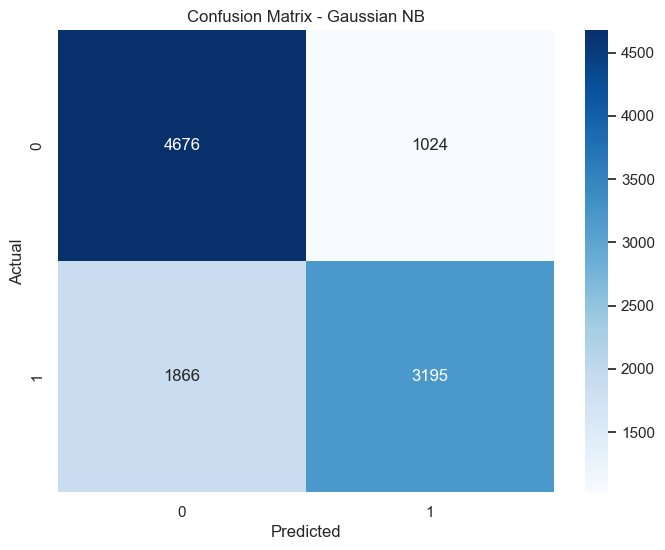

F1 Score: 0.7284897037394727
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.82      0.76      5700
           1       0.76      0.63      0.69      5061

    accuracy                           0.73     10761
   macro avg       0.74      0.73      0.73     10761
weighted avg       0.73      0.73      0.73     10761



In [102]:
from sklearn.naive_bayes import GaussianNB
# Assuming you have already defined X_train, X_test, y_train, y_test

model6 = GaussianNB()
model6.fit(X_train, y_train)
y_prediction6 = model6.predict(X_test)

confusion_matrix6 = metrics.confusion_matrix(y_test, y_prediction6)
cm_df6 = pd.DataFrame(confusion_matrix6, index=[0, 1], columns=[0, 1])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df6, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gaussian NB')
plt.show()

f1_score6 = metrics.f1_score(y_test, y_prediction6, average='weighted')
print("F1 Score:", f1_score6)

classification_report6 = metrics.classification_report(y_test, y_prediction6)
print("Classification Report:\n", classification_report6)


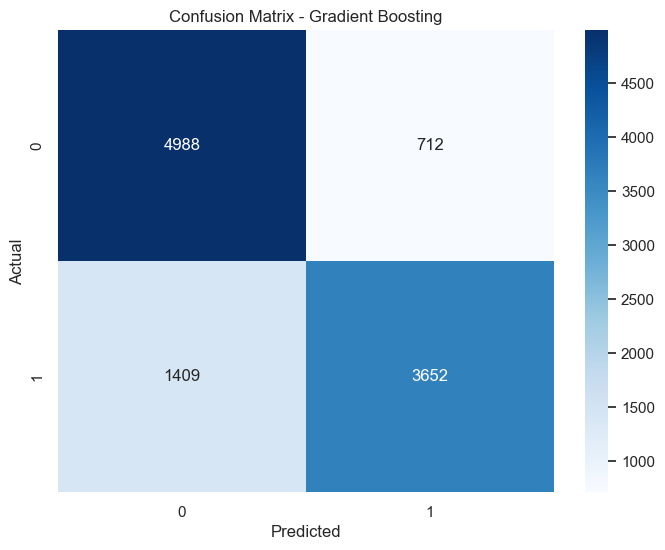

F1 Score: 0.8012895724704414
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82      5700
           1       0.84      0.72      0.77      5061

    accuracy                           0.80     10761
   macro avg       0.81      0.80      0.80     10761
weighted avg       0.81      0.80      0.80     10761



In [103]:
from sklearn.ensemble import GradientBoostingClassifier
# Assuming you have already defined X_train, X_test, y_train, y_test

model7 = GradientBoostingClassifier()
model7.fit(X_train, y_train)
y_prediction7 = model7.predict(X_test)

confusion_matrix7 = metrics.confusion_matrix(y_test, y_prediction7)
cm_df7 = pd.DataFrame(confusion_matrix7, index=[0, 1], columns=[0, 1])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df7, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

f1_score7 = metrics.f1_score(y_test, y_prediction7, average='weighted')
print("F1 Score:", f1_score7)

classification_report7 = metrics.classification_report(y_test, y_prediction7)
print("Classification Report:\n", classification_report7)


C:\Users\91886\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


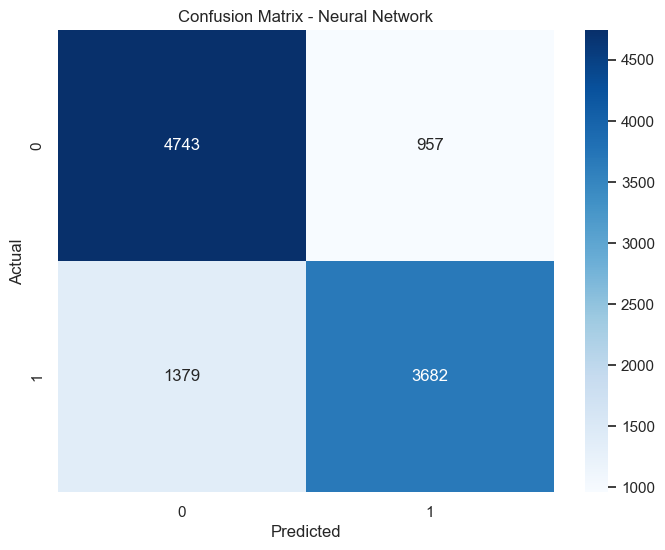

F1 Score: 0.7820722139126169
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80      5700
           1       0.79      0.73      0.76      5061

    accuracy                           0.78     10761
   macro avg       0.78      0.78      0.78     10761
weighted avg       0.78      0.78      0.78     10761



In [104]:
from sklearn.neural_network import MLPClassifier
# Assuming you have already defined X_train, X_test, y_train, y_test

model8 = MLPClassifier()
model8.fit(X_train, y_train)
y_prediction8 = model8.predict(X_test)

confusion_matrix8 = metrics.confusion_matrix(y_test, y_prediction8)
cm_df8 = pd.DataFrame(confusion_matrix8, index=[0, 1], columns=[0, 1])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df8, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network')
plt.show()

f1_score8 = metrics.f1_score(y_test, y_prediction8, average='weighted')
print("F1 Score:", f1_score8)

classification_report8 = metrics.classification_report(y_test, y_prediction8)
print("Classification Report:\n", classification_report8)


C:\Users\91886\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


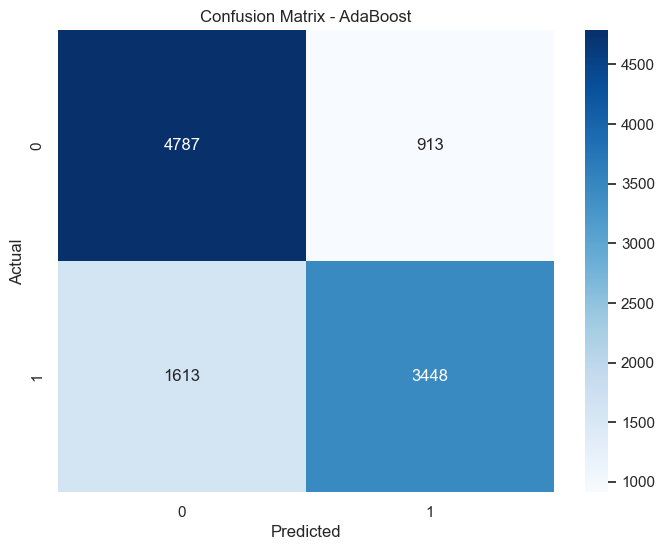

F1 Score: 0.7633335688803825
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79      5700
           1       0.79      0.68      0.73      5061

    accuracy                           0.77     10761
   macro avg       0.77      0.76      0.76     10761
weighted avg       0.77      0.77      0.76     10761



In [105]:
from sklearn.ensemble import AdaBoostClassifier
# Assuming you have already defined X_train, X_test, y_train, y_test

model9 = AdaBoostClassifier()
model9.fit(X_train, y_train)
y_prediction9 = model9.predict(X_test)

confusion_matrix9 = metrics.confusion_matrix(y_test, y_prediction9)
cm_df9 = pd.DataFrame(confusion_matrix9, index=[0, 1], columns=[0, 1])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df9, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AdaBoost')
plt.show()

f1_score9 = metrics.f1_score(y_test, y_prediction9, average='weighted')
print("F1 Score:", f1_score9)

classification_report9 = metrics.classification_report(y_test, y_prediction9)
print("Classification Report:\n", classification_report9)


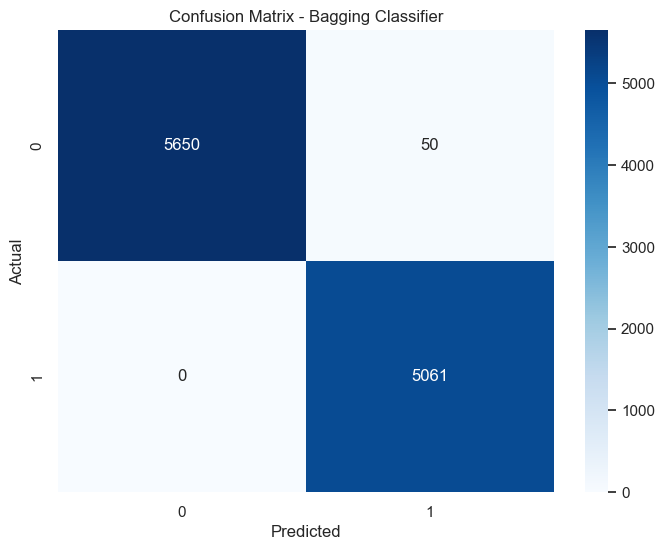

F1 Score: 0.9953547768976961
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      5700
           1       0.99      1.00      1.00      5061

    accuracy                           1.00     10761
   macro avg       1.00      1.00      1.00     10761
weighted avg       1.00      1.00      1.00     10761



In [106]:
from sklearn.ensemble import BaggingClassifier
# Assuming you have already defined X_train, X_test, y_train, y_test

model10 = BaggingClassifier()
model10.fit(X_train, y_train)
y_prediction10 = model10.predict(X_test)

confusion_matrix10 = metrics.confusion_matrix(y_test, y_prediction10)
cm_df10 = pd.DataFrame(confusion_matrix10, index=[0, 1], columns=[0, 1])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df10, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Bagging Classifier')
plt.show()

f1_score10 = metrics.f1_score(y_test, y_prediction10, average='weighted')
print("F1 Score:", f1_score10)

classification_report10 = metrics.classification_report(y_test, y_prediction10)
print("Classification Report:\n", classification_report10)


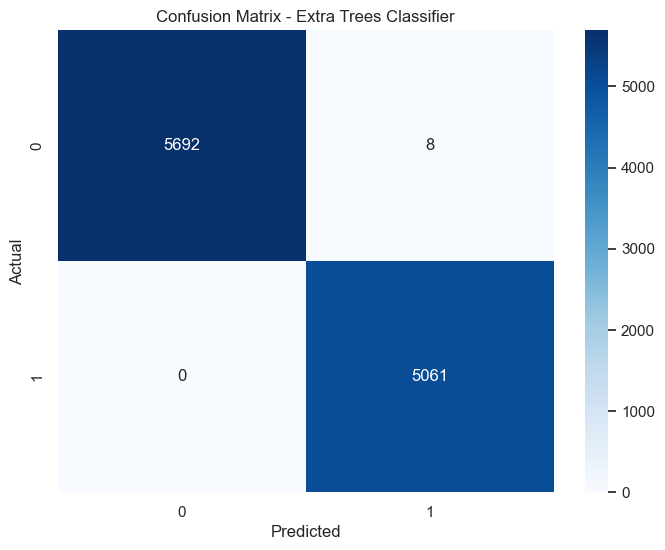

F1 Score: 0.999256607187538
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5700
           1       1.00      1.00      1.00      5061

    accuracy                           1.00     10761
   macro avg       1.00      1.00      1.00     10761
weighted avg       1.00      1.00      1.00     10761



In [107]:
from sklearn.ensemble import ExtraTreesClassifier
# Assuming you have already defined X_train, X_test, y_train, y_test

model11 = ExtraTreesClassifier()
model11.fit(X_train, y_train)
y_prediction11 = model11.predict(X_test)

confusion_matrix11 = metrics.confusion_matrix(y_test, y_prediction11)
cm_df11 = pd.DataFrame(confusion_matrix11, index=[0, 1], columns=[0, 1])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df11, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Extra Trees Classifier')
plt.show()

f1_score11 = metrics.f1_score(y_test, y_prediction11, average='weighted')
print("F1 Score:", f1_score11)

classification_report11 = metrics.classification_report(y_test, y_prediction11)
print("Classification Report:\n", classification_report11)


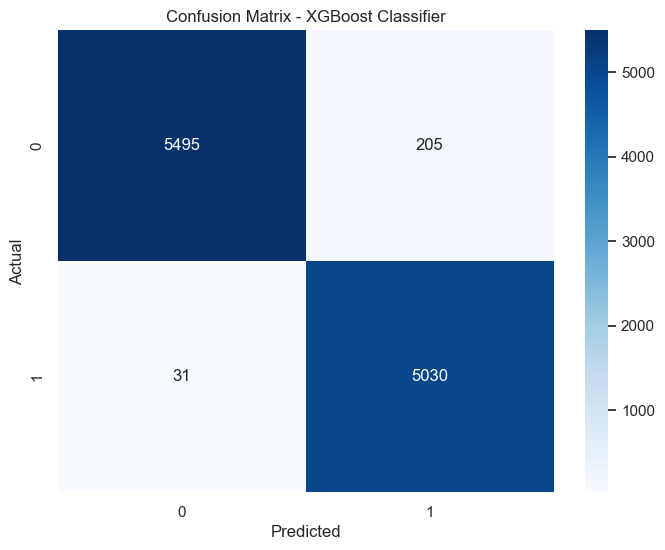

F1 Score: 0.9780843048069986
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      5700
           1       0.96      0.99      0.98      5061

    accuracy                           0.98     10761
   macro avg       0.98      0.98      0.98     10761
weighted avg       0.98      0.98      0.98     10761



In [108]:
import xgboost as xgb
# Assuming you have already defined X_train, X_test, y_train, y_test

model12 = xgb.XGBClassifier()
model12.fit(X_train, y_train)
y_prediction12 = model12.predict(X_test)

confusion_matrix12 = metrics.confusion_matrix(y_test, y_prediction12)
cm_df12 = pd.DataFrame(confusion_matrix12, index=[0, 1], columns=[0, 1])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df12, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()

f1_score12 = metrics.f1_score(y_test, y_prediction12, average='weighted')
print("F1 Score:", f1_score12)

classification_report12 = metrics.classification_report(y_test, y_prediction12)
print("Classification Report:\n", classification_report12)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 11910, number of negative: 13198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1364
[LightGBM] [Info] Number of data points in the train set: 25108, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474351 -> initscore=-0.102687
[LightGBM] [Info] Start training from score -0.102687


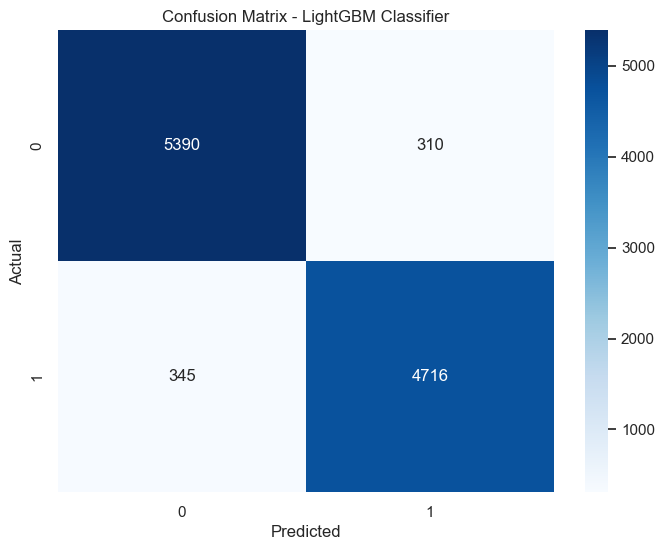

F1 Score: 0.9391196023846186
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      5700
           1       0.94      0.93      0.94      5061

    accuracy                           0.94     10761
   macro avg       0.94      0.94      0.94     10761
weighted avg       0.94      0.94      0.94     10761



In [109]:
import lightgbm as lgb
# Assuming you have already defined X_train, X_test, y_train, y_test

model13 = lgb.LGBMClassifier()
model13.fit(X_train, y_train)
y_prediction13 = model13.predict(X_test)

confusion_matrix13 = metrics.confusion_matrix(y_test, y_prediction13)
cm_df13 = pd.DataFrame(confusion_matrix13, index=[0, 1], columns=[0, 1])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df13, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM Classifier')
plt.show()

f1_score13 = metrics.f1_score(y_test, y_prediction13, average='weighted')
print("F1 Score:", f1_score13)

classification_report13 = metrics.classification_report(y_test, y_prediction13)
print("Classification Report:\n", classification_report13)


Learning rate set to 0.040799
0:	learn: 0.6746158	total: 28ms	remaining: 28s
1:	learn: 0.6584779	total: 57ms	remaining: 28.5s
2:	learn: 0.6440671	total: 83.5ms	remaining: 27.8s
3:	learn: 0.6314026	total: 108ms	remaining: 26.9s
4:	learn: 0.6200027	total: 139ms	remaining: 27.7s
5:	learn: 0.6097662	total: 166ms	remaining: 27.5s
6:	learn: 0.6009687	total: 190ms	remaining: 26.9s
7:	learn: 0.5934209	total: 216ms	remaining: 26.8s
8:	learn: 0.5865954	total: 244ms	remaining: 26.8s
9:	learn: 0.5799901	total: 271ms	remaining: 26.8s
10:	learn: 0.5745331	total: 295ms	remaining: 26.5s
11:	learn: 0.5700509	total: 320ms	remaining: 26.4s
12:	learn: 0.5659840	total: 347ms	remaining: 26.4s
13:	learn: 0.5627052	total: 372ms	remaining: 26.2s
14:	learn: 0.5586786	total: 398ms	remaining: 26.1s
15:	learn: 0.5553458	total: 425ms	remaining: 26.1s
16:	learn: 0.5519745	total: 453ms	remaining: 26.2s
17:	learn: 0.5476572	total: 483ms	remaining: 26.3s
18:	learn: 0.5445927	total: 510ms	remaining: 26.3s
19:	learn: 0.5

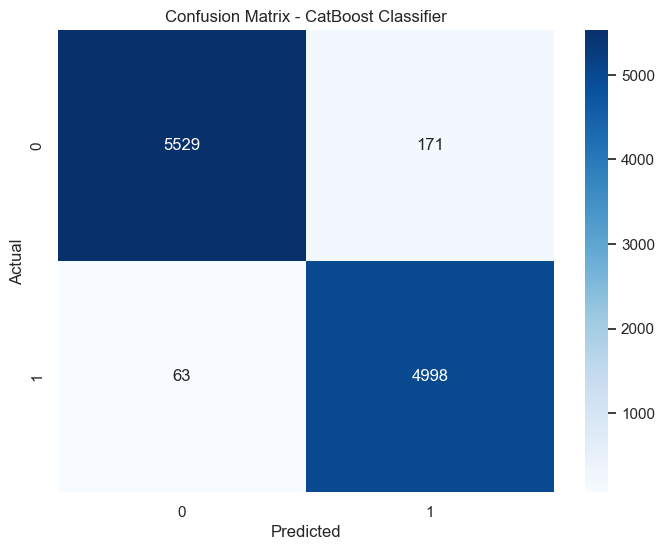

F1 Score: 0.9782656043396665
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      5700
           1       0.97      0.99      0.98      5061

    accuracy                           0.98     10761
   macro avg       0.98      0.98      0.98     10761
weighted avg       0.98      0.98      0.98     10761



In [110]:
from catboost import CatBoostClassifier
# Assuming you have already defined X_train, X_test, y_train, y_test

model14 = CatBoostClassifier()
model14.fit(X_train, y_train)
y_prediction14 = model14.predict(X_test)

confusion_matrix14 = metrics.confusion_matrix(y_test, y_prediction14)
cm_df14 = pd.DataFrame(confusion_matrix14, index=[0, 1], columns=[0, 1])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df14, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost Classifier')
plt.show()

f1_score14 = metrics.f1_score(y_test, y_prediction14, average='weighted')
print("F1 Score:", f1_score14)

classification_report14 = metrics.classification_report(y_test, y_prediction14)
print("Classification Report:\n", classification_report14)


<function matplotlib.pyplot.ylim(*args, **kwargs)>

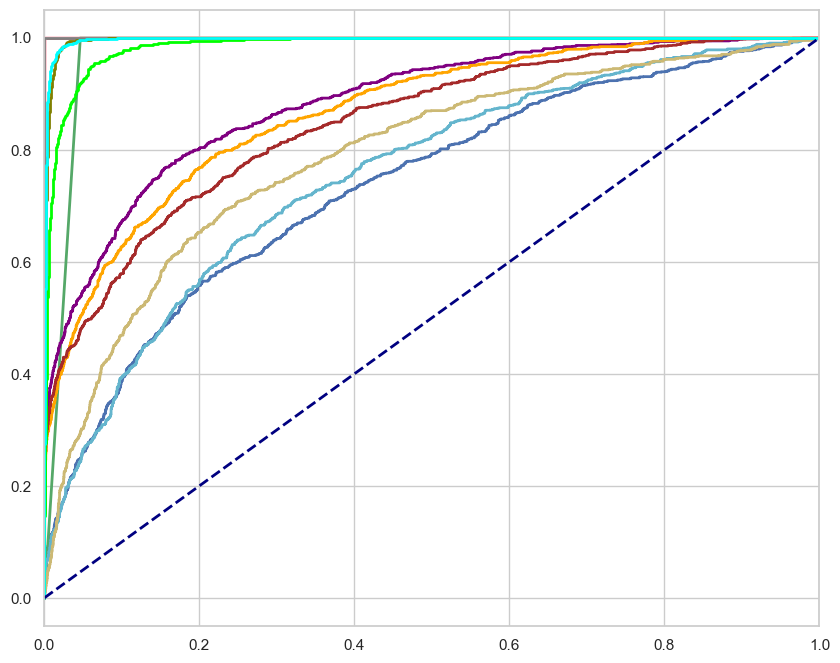

In [111]:
from sklearn.metrics import roc_curve, auc

# Assuming you have defined the models and X_test, y_test for each classifier

# Logistic Regression
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
roc_auc1 = auc(fpr1, tpr1)

# Decision Tree Classifier
fpr2, tpr2, thresholds2 = roc_curve(y_test, model2.predict_proba(X_test)[:,1])
roc_auc2 = auc(fpr2, tpr2)

# Random Forest Classifier
fpr3, tpr3, thresholds3 = roc_curve(y_test, model3.predict_proba(X_test)[:,1])
roc_auc3 = auc(fpr3, tpr3)

# SVC
fpr4, tpr4, thresholds4 = roc_curve(y_test, model4.decision_function(X_test))
roc_auc4 = auc(fpr4, tpr4)

# Gaussian Naive Bayes
fpr6, tpr6, thresholds6 = roc_curve(y_test, model6.predict_proba(X_test)[:,1])
roc_auc6 = auc(fpr6, tpr6)

# Gradient Boosting Classifier
fpr7, tpr7, thresholds7 = roc_curve(y_test, model7.predict_proba(X_test)[:,1])
roc_auc7 = auc(fpr7, tpr7)

# Neural Network
fpr8, tpr8, thresholds8 = roc_curve(y_test, model8.predict_proba(X_test)[:,1])
roc_auc8 = auc(fpr8, tpr8)

# AdaBoost Classifier
fpr9, tpr9, thresholds9 = roc_curve(y_test, model9.predict_proba(X_test)[:,1])
roc_auc9 = auc(fpr9, tpr9)

# Bagging Classifier
fpr10, tpr10, thresholds10 = roc_curve(y_test, model10.predict_proba(X_test)[:,1])
roc_auc10 = auc(fpr10, tpr10)

# Extra Trees Classifier
fpr11, tpr11, thresholds11 = roc_curve(y_test, model11.predict_proba(X_test)[:,1])
roc_auc11 = auc(fpr11, tpr11)

# XGBoost Classifier
fpr12, tpr12, thresholds12 = roc_curve(y_test, model12.predict_proba(X_test)[:,1])
roc_auc12 = auc(fpr12, tpr12)

# LightGBM Classifier
fpr13, tpr13, thresholds13 = roc_curve(y_test, model13.predict_proba(X_test)[:,1])
roc_auc13 = auc(fpr13, tpr13)

# CatBoost Classifier
fpr14, tpr14, thresholds14 = roc_curve(y_test, model14.predict_proba(X_test)[:,1])
roc_auc14 = auc(fpr14, tpr14)

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(fpr1, tpr1, color='b', lw=2, label=f'Logistic Regression (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='g', lw=2, label=f'Decision Tree (AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, color='r', lw=2, label=f'Random Forest (AUC = {roc_auc3:.2f})')
plt.plot(fpr4, tpr4, color='c', lw=2, label=f'SVM (AUC = {roc_auc4:.2f})')
plt.plot(fpr6, tpr6, color='y', lw=2, label=f'Gaussian NB (AUC = {roc_auc6:.2f})')
plt.plot(fpr7, tpr7, color='purple', lw=2, label=f'Gradient Boosting (AUC = {roc_auc7:.2f})')
plt.plot(fpr8, tpr8, color='orange', lw=2, label=f'Neural Network (AUC = {roc_auc8:.2f})')
plt.plot(fpr9, tpr9, color='brown', lw=2, label=f'AdaBoost (AUC = {roc_auc9:.2f})')
plt.plot(fpr10, tpr10, color='pink', lw=2, label=f'Bagging (AUC = {roc_auc10:.2f})')
plt.plot(fpr11, tpr11, color='gray', lw=2, label=f'Extra Trees (AUC = {roc_auc11:.2f})')
plt.plot(fpr12, tpr12, color='olive', lw=2, label=f'XGBoost (AUC = {roc_auc12:.2f})')
plt.plot(fpr13, tpr13, color='lime', lw=2, label=f'LightGBM (AUC = {roc_auc13:.2f})')
plt.plot(fpr14, tpr14, color='cyan', lw=2, label=f'CatBoost (AUC = {roc_auc14:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim


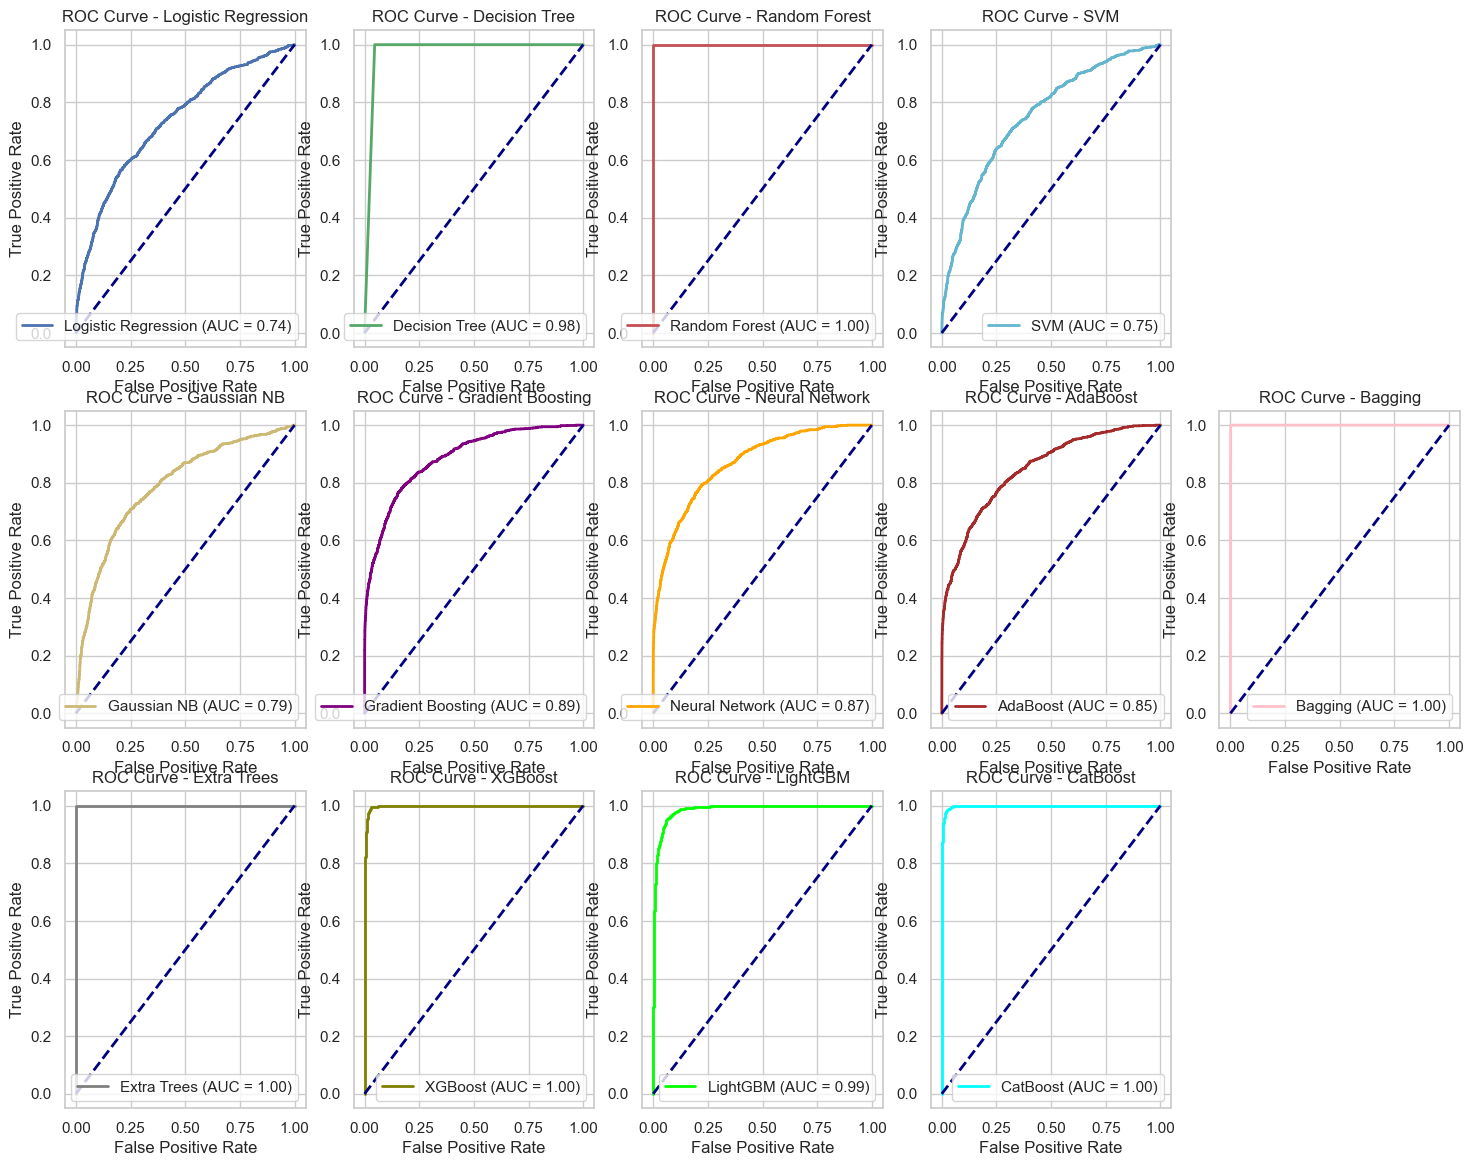

In [112]:
plt.figure(figsize=(18, 14))

# Logistic Regression
plt.subplot(3, 5, 1)
fpr1, tpr1, _ = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
roc_auc1 = auc(fpr1, tpr1)
plt.plot(fpr1, tpr1, color='b', lw=2, label=f'Logistic Regression (AUC = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")

# Decision Tree Classifier
plt.subplot(3, 5, 2)
fpr2, tpr2, _ = roc_curve(y_test, model2.predict_proba(X_test)[:,1])
roc_auc2 = auc(fpr2, tpr2)
plt.plot(fpr2, tpr2, color='g', lw=2, label=f'Decision Tree (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")

# Random Forest Classifier
plt.subplot(3, 5, 3)
fpr3, tpr3, _ = roc_curve(y_test, model3.predict_proba(X_test)[:,1])
roc_auc3 = auc(fpr3, tpr3)
plt.plot(fpr3, tpr3, color='r', lw=2, label=f'Random Forest (AUC = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")

# SVC
plt.subplot(3, 5, 4)
fpr4, tpr4, _ = roc_curve(y_test, model4.decision_function(X_test))
roc_auc4 = auc(fpr4, tpr4)
plt.plot(fpr4, tpr4, color='c', lw=2, label=f'SVM (AUC = {roc_auc4:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")


# Gaussian Naive Bayes
plt.subplot(3, 5, 6)
fpr6, tpr6, _ = roc_curve(y_test, model6.predict_proba(X_test)[:,1])
roc_auc6 = auc(fpr6, tpr6)
plt.plot(fpr6, tpr6, color='y', lw=2, label=f'Gaussian NB (AUC = {roc_auc6:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gaussian NB')
plt.legend(loc="lower right")

# Gradient Boosting Classifier
plt.subplot(3, 5, 7)
fpr7, tpr7, _ = roc_curve(y_test, model7.predict_proba(X_test)[:,1])
roc_auc7 = auc(fpr7, tpr7)
plt.plot(fpr7, tpr7, color='purple', lw=2, label=f'Gradient Boosting (AUC = {roc_auc7:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc="lower right")

# Neural Network
plt.subplot(3, 5, 8)
fpr8, tpr8, _ = roc_curve(y_test, model8.predict_proba(X_test)[:,1])
roc_auc8 = auc(fpr8, tpr8)
plt.plot(fpr8, tpr8, color='orange', lw=2, label=f'Neural Network (AUC = {roc_auc8:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc="lower right")

# AdaBoost Classifier
plt.subplot(3, 5, 9)
fpr9, tpr9, _ = roc_curve(y_test, model9.predict_proba(X_test)[:,1])
roc_auc9 = auc(fpr9, tpr9)
plt.plot(fpr9, tpr9, color='brown', lw=2, label=f'AdaBoost (AUC = {roc_auc9:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost')
plt.legend(loc="lower right")

# Bagging Classifier
plt.subplot(3, 5, 10)
fpr10, tpr10, _ = roc_curve(y_test, model10.predict_proba(X_test)[:,1])
roc_auc10 = auc(fpr10, tpr10)
plt.plot(fpr10, tpr10, color='pink', lw=2, label=f'Bagging (AUC = {roc_auc10:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bagging')
plt.legend(loc="lower right")

# Extra Trees Classifier
plt.subplot(3, 5, 11)
fpr11, tpr11, _ = roc_curve(y_test, model11.predict_proba(X_test)[:,1])
roc_auc11 = auc(fpr11, tpr11)
plt.plot(fpr11, tpr11, color='gray', lw=2, label=f'Extra Trees (AUC = {roc_auc11:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Extra Trees')
plt.legend(loc="lower right")

# XGBoost Classifier
plt.subplot(3, 5, 12)
fpr12, tpr12, _ = roc_curve(y_test, model12.predict_proba(X_test)[:,1])
roc_auc12 = auc(fpr12, tpr12)
plt.plot(fpr12, tpr12, color='olive', lw=2, label=f'XGBoost (AUC = {roc_auc12:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")

# LightGBM Classifier
plt.subplot(3, 5, 13)
fpr13, tpr13, _ = roc_curve(y_test, model13.predict_proba(X_test)[:,1])
roc_auc13 = auc(fpr13, tpr13)
plt.plot(fpr13, tpr13, color='lime', lw=2, label=f'LightGBM (AUC = {roc_auc13:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend(loc="lower right")

# CatBoost Classifier
plt.subplot(3, 5, 14)
fpr14, tpr14, _ = roc_curve(y_test, model14.predict_proba(X_test)[:,1])
roc_auc14 = auc(fpr14, tpr14)
plt.plot(fpr14, tpr14, color='cyan', lw=2, label=f'CatBoost (AUC = {roc_auc14:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost')
plt.legend(loc="lower right")
